# Simple Network with Two Stages 

This example contains a network with two stages. The input stage has 6 inputs and 12 outputs while the output stage has 12 inputs and 6 outputs. This case is a piece of a braille recognition example found below. 

http://neuroph.sourceforge.net/tutorials/Braille/RecognitionOfBrailleAlphabetUsingNeuralNetworks.html

This case requires a hidden stage for proper convergence so this example is only showing that all of the standard operations for the neural network can work for this case.

1. Feedforward Operation
1. Tap/Bias Updates
1. Error Back Propagation


## Code Generator Details

The code used for this example is contained in the following locations : 

1. [Test Generator](https://github.com/andywag/NeuralHDL/blob/master/src/test/scala/com/simplifide/generate/neural/DoubleStageTest.scala)
1. [Block Generator](https://github.com/andywag/NeuralHDL/blob/master/src/main/scala/com/simplifide/generate/blocks/neural/simple/NeuralNetwork.scala)
1. [Generated Code and Test Results](https://github.com/andywag/NeuralHDL/tree/master/tests/full)


## Test Generator Code
The code shown below is the basic test configuration for all the tests in the section. 

  ```scala
  override lazy val inputType:BasicNetworkTest.INPUT_TYPE = BasicNetworkTest.IDENT_TYPE
  override val plot:Boolean = true
  override val failThreshold = Some(0.1)
  override lazy val tapScale:Seq[Double] = Seq(.5,.5)


  override lazy val tapEnable = List(1,1)
  override lazy val biasEnable = List(1,1)
  override def getTestLength = BasicTestInformation.tapLength*1024

  // Fifo depths for test currently constant
  lazy val dataFill      = Seq(10,10)
  lazy val errorFill     = Seq(10,10)
  lazy val outputFill    = Seq(10,10)


  lazy val numberNeurons = Seq(6,6)
  lazy val dimensions = Seq((6,12),(12,6))

  def getInformation = dimensions.zipWithIndex.map(x => {
    NeuralStageInfo(x._1,
      dataFill(x._2),
      numberNeurons(x._2),
      errorFill(x._2),
      outputFill(x._2),
      dataLocation,x._1._2,
      Some(s"${dataLocation}/init_taps${x._2}")
    )
  })


  override lazy val gain = Seq(3,3)
  ```

In [19]:
## Test Results

In [20]:
import sys
sys.path.append("../../python") # go to parent dir

import numpy as numpy
import matplotlib.pyplot as plt
import utils.FloatUtil as fu
import utils.PlotUtil as pu


def show_results(base,index) : 
    pu.handleStage(base,index,True)
    plt.show()

### Identity Matrix Test Results 

This very simple network will not properly converge for this example. For that reason the network was tested with an identity matrix (input = output) to prove the convergence of the taps and bias for this case. The results of the test are shown below with a relatively quick convergence and small steady state error. The case is not actually an identity matrix but a diagonal matrix with alternating +1/-1.  

### Test Generator Code
```scala
class Two6x6x6 extends BaseTwo(6,6) {
  override lazy val tapScale:Seq[Double] = Seq(.25,.25)
}
```

Square Error 0 0.0155963414128


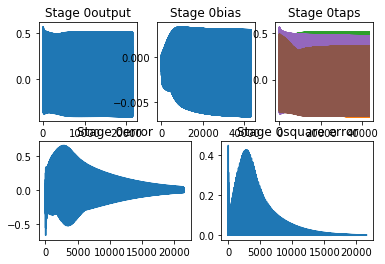

In [21]:
show_results("/home/andy/projects/NeuralHDL/tests/two6_6/data/",0)

Square Error 1 0.00950704903498


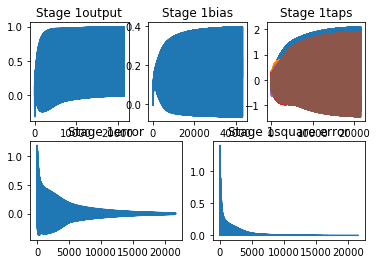

In [22]:
show_results("/home/andy/projects/NeuralHDL/tests/two6_6/data/",1)

### Results with more General Input/Outputs

This case uses the input/output matrix shown below. The first 6 columns are the input to the block and the last 6 columns are the expected values. 

### Test Generator Code
```scala
class Two6x6_B extends BaseTwo(6,6) {
  override def blockName: String = s"two${first}_${middle}_b"
  override lazy val inputType:BasicNetworkTest.INPUT_TYPE = BasicNetworkTest.BRAILE_TYPE
  override lazy val tapScale:Seq[Double] = Seq(.25,.25)
}
```

```scala
  Array(1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0)
  Array(1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0)
  Array(1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0)
  Array(1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0)
  Array(1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0)
  Array(0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0)
```

The test results for this case are shown below. The main purpose of this test is to show a network which contains all of the operations for the network. The results shown below show the system converging and tracking for both the outputs of the first stage and output stage.  

Square Error 0 0.0478242390312


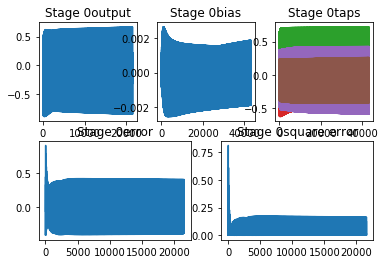

In [23]:
show_results("/home/andy/projects/NeuralHDL/tests/two6_6_b/data/",0)

Square Error 1 0.0299185988176


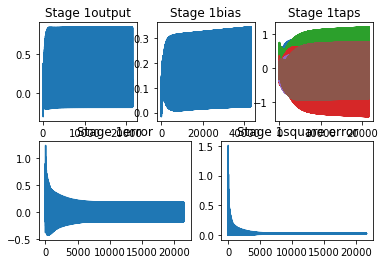

In [24]:
show_results("/home/andy/projects/NeuralHDL/tests/two6_6_b/data/",1)

### 10x10 results

This case tests a network with a 10 inputs and outputs. 


### Test Generator Code
```scala
class Two10x10x10 extends BaseTwo(10,10) {
  override lazy val tapScale:Seq[Double] = Seq(.5,.5)
}
```

Square Error 0 0.0216876696086


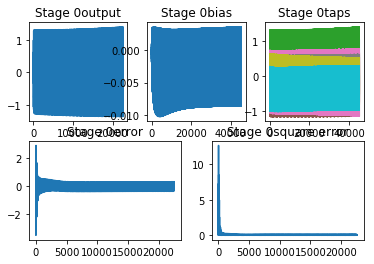

In [25]:
show_results("/home/andy/projects/NeuralHDL/tests/two10_10/data/",0)

Square Error 1 0.0170103163774


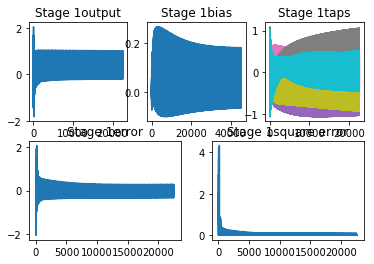

In [26]:
show_results("/home/andy/projects/NeuralHDL/tests/two10_10/data/",1)

### 6x12x6 Results

This tests case checks a network with non symmetric stage configurations. 

`There is a current control issue when the stages are not symmetric. This is due to proper handling of back pressure through the network and is currently being actively debugged.`


### Test Generator Code
```scala
class Two6x12x6 extends BaseTwo(6,12) {}
```

Square Error 0 0.225787338227


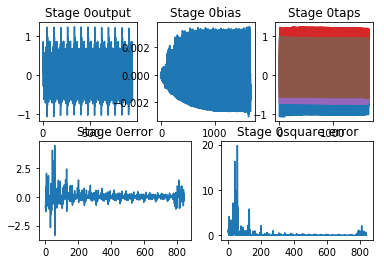

In [27]:
show_results("/home/andy/projects/NeuralHDL/tests/two6_12/data/",0)

Square Error 1 0.176484209466


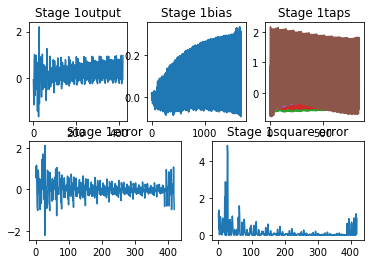

In [28]:
show_results("/home/andy/projects/NeuralHDL/tests/two6_12/data/",1)